In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import pickle

In [2]:
data = np.load('../data/data_80x80.npz')

In [6]:
data.files

['arr_0', 'arr_1']

In [10]:
X = data['arr_0']
X.shape

(934, 6400)

In [9]:
y = data['arr_1']
y.shape

(934,)

### Eigen Image

In [11]:
from sklearn.decomposition import PCA

In [12]:
X1 = X - X.mean(axis=0)
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
x_pca = pca.fit_transform(X1)

In [14]:
x_pca.shape

(934, 934)

In [15]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

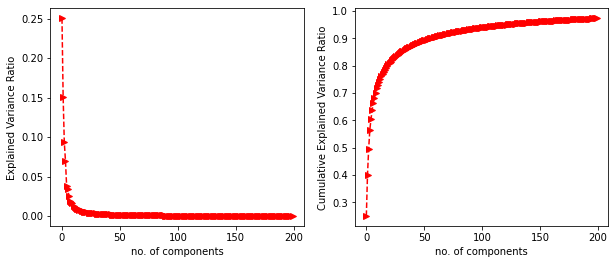

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200], 'r>--');
plt.xlabel('no. of components')
plt.ylabel('Explained Variance Ratio')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200], 'r>--');
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explained Variance Ratio')

In [29]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)
x_pca_50.shape

(934, 50)

In [32]:
pickle.dump(pca_50, open('../data/pca_50.pickle', 'wb'))

In [34]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)
x_pca_inv.shape

(934, 6400)

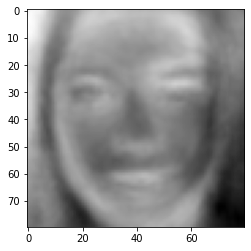

In [41]:
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((80,80))
plt.imshow(eig_img, cmap='gray');

In [42]:
def label(y):
    if y == 1:
        return 'Male'
    return 'Female'

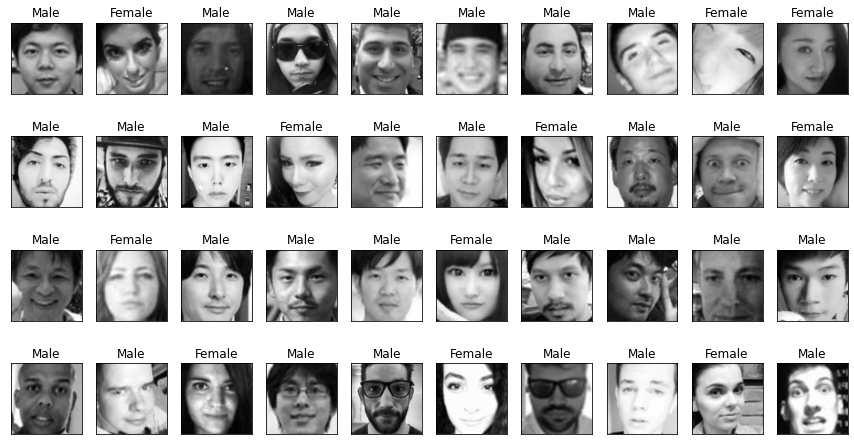

In [47]:
np.random.randint(1001)
pics = np.random.randint(0,933,40)
plt.figure(figsize=(15,8))

for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(80,80)
    plt.imshow(img, cmap='gray');
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])

                    ====================Eigen Images====================


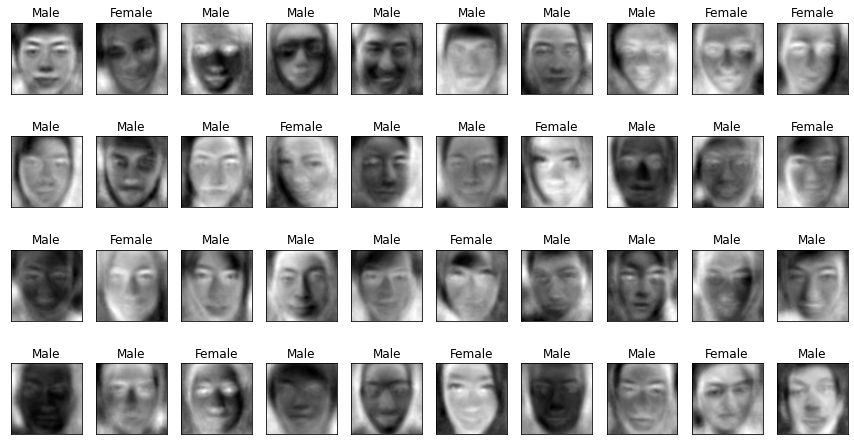

In [56]:
plt.figure(figsize=(15,8))
print(' '*20 + '='*20 + "Eigen Images" + "="*20)

for i, pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(80,80)
    plt.imshow(img, cmap='gray');
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])

In [58]:
np.savez('../data/data_pca_50_y_mean', x_pca_50, y, X.mean())